# Setup

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
date_filename = "2018-02-01_2018-02-28"

In [3]:
data = pd.read_csv("articles_" + date_filename + ".csv", index_col="id", \
                   parse_dates=["published", "discovered"])
data.head()

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
402fd72431c6a0e29e76fc9abaa6bc0d42f2ea81,https://www.thetimes.co.uk/article/mistakes-pr...,‘Mistakes’ prove costly for a chastened H&M,2018-02-01 00:06:11.391,2018-02-01,0,0.000000,2018-02-01T01:19:11.780Z,0,0,0,The Times,thetimes_co_uk,0,1440,283.0,False,NaN,NaN,6435,125.0
956698308752aa83f6ad988aa05a4f26f5514f9e,https://www.thetimes.co.uk/article/met-office-...,Met Office puts accent on the regions,2018-02-01 00:05:43.754,2018-02-01,2,0.016407,2018-02-01T09:25:15.520Z,1,0,1,The Times,thetimes_co_uk,0,1440,283.0,False,NaN,NaN,6435,125.0
1524679962f3bef642390e1955d470fe0acc2aff,https://www.thetimes.co.uk/article/world-s-ric...,World’s richest offer £100k salaries for Briti...,2018-02-01 00:05:46.313,2018-02-01,9,0.032886,2018-02-01T18:33:06.181Z,1,2,6,The Times,thetimes_co_uk,0,1440,283.0,False,NaN,NaN,6435,125.0
13646fa08dee5c8b5bdd718ab882cb988a1eb85f,https://www.thetimes.co.uk/article/mother-give...,Mother gives birth in jail as vital evidence i...,2018-02-01 00:05:37.255,2018-02-01,5,0.033241,2018-02-01T16:31:16.418Z,1,2,2,The Times,thetimes_co_uk,0,1440,283.0,False,NaN,NaN,6435,125.0
44dccc673596c768f1129a020c1b6b0c6ff8ab66,https://www.thetimes.co.uk/article/apple-inves...,Apple investigated over phone slowdown,2018-02-01 00:05:38.393,2018-02-01,12,0.065574,2018-02-01T11:27:12.692Z,5,4,3,The Times,thetimes_co_uk,0,1440,283.0,False,NaN,NaN,6435,125.0


# Response Score

The response score is a number between 0 and 50 that indicates the level of response to an article.



Perhaps in the future we may choose to include other factors, but for now we just include engagements on Facebook. The maximum score of 50 should be achieved by an article that does really well compared with others.

In [4]:
pd.options.display.float_format = '{:.2f}'.format
data.fb_engagements.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    136062.00
mean       1237.17
std       11019.23
min           0.00
50%          25.00
75%         241.00
90%        1453.00
95%        3841.85
99%       23172.80
99.5%     38692.09
99.9%    116762.69
max     1733438.00
Name: fb_engagements, dtype: float64

There's 2 articles with more than 1 million engagements this month.

In [5]:
data[data.fb_engagements > 1000000]

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,publisher_name,publisher_id,mins_as_lead,mins_on_front,num_articles_on_front,fb_brand_page,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count
id,,,,,,,,,,,,,,,,,,,,
fb1944a99013e1b35fd6a91c48804999102e083e,https://www.nbcnews.com/politics/donald-trump/...,Trump Signs Bill Revoking Obama-Era Gun Checks...,2018-02-15 21:25:15.475,2018-02-15 21:23:07,1733438,4222.05,2018-02-17T21:37:14.123Z,579201,879715,274522,NBC News,nbcnews_com,0,230,123.00,False,nan,NaN,826,410.00
eb66c2d3e4862b7dd4b1321a8636fd9ce19a9454,http://www.foxnews.com/us/2018/02/16/florida-t...,Florida Teacher of the Year's gun violence pos...,2018-02-16 20:39:09.526,2018-02-16 20:01:41,1005295,2850.50,2018-02-17T06:02:17.750Z,119159,699578,186558,Fox News,foxnews_com,0,1168,170.00,True,16202655.00,2018-02-16T23:46:04.000Z,285,660.00


In [6]:
data.fb_engagements.mode()

0    0
dtype: int64

*november* Going back to the enagement counts, we see the mean is 1,117, mode is zero, median is 24, 90th percentile is 1,453, 99th percentile is 21,166, 99.5th percentile is 33,982. The standard deviation is 8,083, significantly higher than the mean, so this is not a normal distribution. 

*december* Going back to the enagement counts, we see the mean is 1,106, mode is zero, median is 24, 90th percentile is 1,545, 99th percentile is 20,228, 99.5th percentile is 32,446. The standard deviation is 9,852, significantly higher than the mean, so this is not a normal distribution. 

*january 2018* Going back to the enagement counts, we see the mean is 1,108, mode is zero, median is 26, 90th percentile is 1,621, 99th percentile is 19,918, 99.5th percentile is 32,935. The standard deviation is 8,278, significantly higher than the mean, so this is not a normal distribution. 

*febrary 2018* Going back to the enagement counts, we see the mean is 1,237, mode is zero, median is 25, 90th percentile is 1,453, 99th percentile is 23,172, 99.5th percentile is 38,692. The standard deviation is 11,019, significantly higher than the mean, so this is not a normal distribution. 

Key publishers stats

In [7]:
data.groupby("publisher_id").agg({'url': 'count', 'fb_engagements': ['sum', 'median', 'mean']})

url fb_engagements                
                                  count            sum  median    mean
publisher_id                                                          
anotherangryvoice_blogspot_co_uk     28          94804 1286.50 3385.86
bbc_co_uk                         11509        8867217   29.00  770.46
breitbart_com                      2565        9295242  182.00 3623.88
brexitcentral_com                    59          39801  230.00  674.59
buzzfeed_com                       1323        4651835  218.00 3516.13
cnn_com                            3898       23528295  565.00 6035.99
dailymail_co_uk                   23015       13477979   21.00  585.62
economist_com                       501         165074   36.00  329.49
evolvepolitics_com                   63         188901 1697.00 2998.43
foxnews_com                        5592       16520792   66.00 2954.36
ft_com                             4368         322462    4.00   73.82
huffingtonpost_com                 2498       12873544  710.00 5153.54
independent_co_uk                  5246        3799617   33.00  724.29
indy100_com                         434         487881   90.50 1124.15
lemonde_fr                         3765        1695720   63.00  450.39
libdemvoice_org                     149           2012    7.00   13.50
mirror_co_uk                       9642        5307000   30.00  550.40
nbcnews_com                        1685        8958300  458.00 5316.50
newstatesman_com                    418          85245   30.00  203.94
npr_org                            1952        9781344  255.50 5010.93
nytimes_com                        4352       17345404  215.00 3985.62
order-order_com                     240          73039  169.00  304.33
propublica_org                       41          61980  570.00 1511.71
reuters_com                        5653        2095413   18.00  370.67
rt_com                             2199        1881653  238.00  855.69
skwawkbox_org                       102          47299  244.50  463.72
telegraph_co_uk                    6223        1530290   16.00  245.91
thecanary_co                        182         179683  493.50  987.27
theguardian_com                    7750        8451675  117.00 1090.54
thetimes_co_uk                     8336         307256    1.00   36.86
washingtonpost_com                21670       14148474    0.00  652.91
westmonster_com                     206         239325   49.50 1161.77
yournewswire_com                    398        1826893  123.50 4590.18

In [8]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()

non_zero_fb_enagagements = data.fb_engagements[data.fb_engagements > 0]

That's a bit better, but still way too clustered at the low end. Let's look at a log normal distribution.

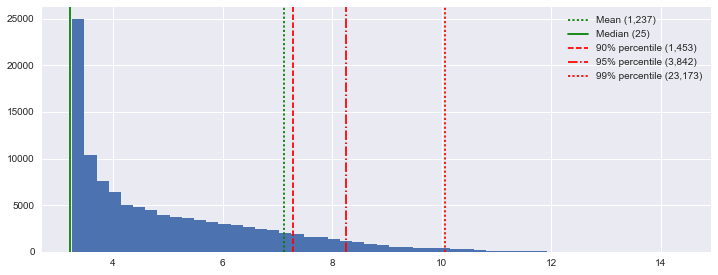

In [9]:
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(12,4.5))
plt.hist(np.log(non_zero_fb_enagagements + median), bins=50)
plt.axvline(np.log(mean), linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(np.log(median), label=f'Median ({median:,.0f})', color='green')
plt.axvline(np.log(ninety), linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(np.log(ninetyfive), linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
plt.axvline(np.log(ninetynine), linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


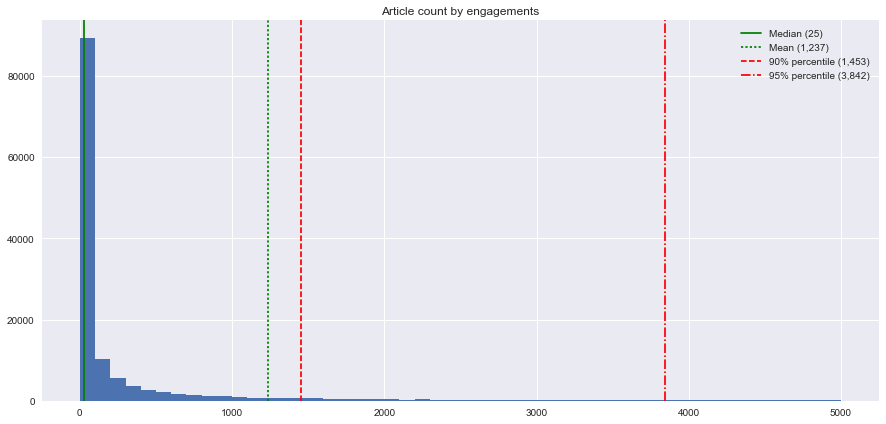

In [10]:
eng = data.fb_engagements[(data.fb_engagements < 5000)]
mean = data.fb_engagements.mean()
median = data.fb_engagements.median()
ninety = data.fb_engagements.quantile(.90)
ninetyfive = data.fb_engagements.quantile(.95)
ninetynine = data.fb_engagements.quantile(.99)

plt.figure(figsize=(15,7))
plt.hist(eng, bins=50)
plt.title("Article count by engagements")
plt.axvline(median, label=f'Median ({median:,.0f})', color='green')
plt.axvline(mean, linestyle=':', label=f'Mean ({mean:,.0f})', color='green')
plt.axvline(ninety, linestyle='--', label=f'90% percentile ({ninety:,.0f})', color='red')
plt.axvline(ninetyfive, linestyle='-.', label=f'95% percentile ({ninetyfive:,.0f})', color='red')
# plt.axvline(ninetynine, linestyle=':', label=f'99% percentile ({ninetynine:,.0f})', color='red')
leg = plt.legend()


In [11]:
log_engagements = (non_zero_fb_enagagements
                   .clip_upper(data.fb_engagements.quantile(.999))
                   .apply(lambda x: np.log(x + median))
                  )
log_engagements.describe()

count   110738.00
mean         4.99
std          1.75
min          3.26
25%          3.53
50%          4.41
75%          6.03
max         11.67
Name: fb_engagements, dtype: float64

Use standard feature scaling to bring that to a 1 to 50 range


In [12]:
def scale_log_engagements(engagements_logged):
    return np.ceil(
        50 * (engagements_logged - log_engagements.min()) / (log_engagements.max() - log_engagements.min())
    )

def scale_engagements(engagements):
    return scale_log_engagements(np.log(engagements + median))

scaled_non_zero_engagements = scale_log_engagements(log_engagements)
scaled_non_zero_engagements.describe()

count   110738.00
mean        10.78
std         10.43
min          0.00
25%          2.00
50%          7.00
75%         17.00
max         50.00
Name: fb_engagements, dtype: float64

In [13]:
# add in the zeros, as zero
scaled_engagements = pd.concat([scaled_non_zero_engagements, data.fb_engagements[data.fb_engagements == 0]])

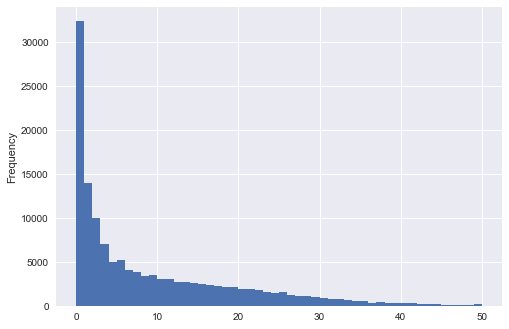

In [14]:
proposed = pd.DataFrame({"fb_engagements": data.fb_engagements, "response_score": scaled_engagements})
proposed.response_score.plot.hist(bins=50)

Looks good to me, lets save that.

In [15]:
data["response_score"] = proposed.response_score

### Proposal

The maximum of 50 points is awarded when the engagements are greater than the 99.9th percentile, rolling over the last month. 

i.e. where $limit$ is the 99.5th percentile of engagements calculated over the previous month, the response score for article $a$ is:

\begin{align}
basicScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   \log(\min(engagements_a,limit) + median(engagements))      & \text{if } engagements_a > 0
\end{cases} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot \frac{basicScore_a - \min(basicScore)}{\max(basicScore) - \min(basicScore)}       & \text{if } engagements_a > 0
\end{cases} \\
\\
\text{The latter equation can be expanded to:} \\
responseScore_a & = 
\begin{cases} 
   0 & \text{if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))}       & \text{if } engagements_a > 0
\end{cases} \\
\end{align}

# Promotion Score

The aim of the promotion score is to indicate how important the article was to the publisher, by tracking where they chose to promote it. This is a number between 0 and 50 comprised of:

- 20 points based on whether the article was promoted as the "lead" story on the publisher's home page
- 15 points based on how long the article was promoted anywhere on the publisher's home page
- 15 points based on whether the article was promoted on the publisher's main facebook brand page

The first two should be scaled by the popularity/reach of the home page, for which we use the alexa page rank as a proxy.

The last should be scaled by the popularity/reach of the brand page, for which we use the number of likes the brand page has.

### Lead story (20 points)

In [16]:
data.mins_as_lead.describe([0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count   136062.00
mean         9.28
std        124.25
min          0.00
50%          0.00
75%          0.00
90%          0.00
95%          0.00
99%        270.00
99.5%      557.78
99.9%     1159.94
max      30386.00
Name: mins_as_lead, dtype: float64

As expected, the vast majority of articles don't make it as lead. Let's explore how long typically publishers put something as lead for.

In [17]:
lead_articles = data[data.mins_as_lead > 0]

In [18]:
lead_articles.mins_as_lead.describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999])

count    3769.00
mean      335.12
std       669.51
min         4.00
25%        89.00
50%       180.00
75%       415.00
90%       818.20
95%      1071.80
99%      1575.92
99.5%    2007.16
99.9%    7185.27
max     30386.00
Name: mins_as_lead, dtype: float64

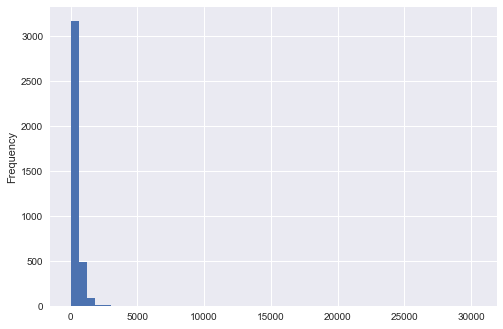

In [19]:
lead_articles.mins_as_lead.plot.hist(bins=50)

For lead, it's a  significant thing for an article to be lead at all, so although we want to penalise articles that were lead for a very short time, mostly we want to score the maximum even if it wasn't lead for ages. So we'll give maximum points when something has been lead for an hour.

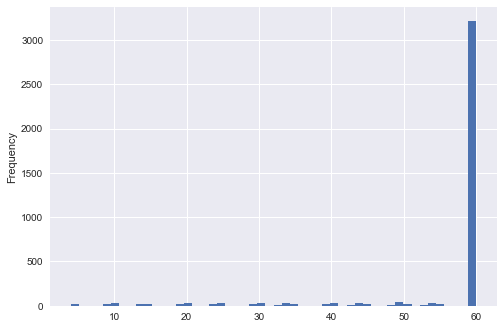

In [20]:
lead_articles.mins_as_lead.clip_upper(60).plot.hist(bins=50)

We also want to scale this by the alexa page rank, such that the maximum score of 20 points is for an article that was on the front for 4 hours for the most popular site.

So lets explore the alexa nunbers.

In [21]:
alexa_ranks = data.groupby(by="publisher_id").alexa_rank.mean().sort_values()
alexa_ranks

publisher_id
bbc_co_uk                               96
cnn_com                                105
nytimes_com                            120
theguardian_com                        142
buzzfeed_com                           147
dailymail_co_uk                        158
washingtonpost_com                     191
huffingtonpost_com                     215
foxnews_com                            285
rt_com                                 365
telegraph_co_uk                        370
independent_co_uk                      386
reuters_com                            497
npr_org                                594
lemonde_fr                             618
mirror_co_uk                           706
nbcnews_com                            826
breitbart_com                          994
ft_com                                1596
economist_com                         1825
indy100_com                           5014
thetimes_co_uk                        6435
newstatesman_com                     1276

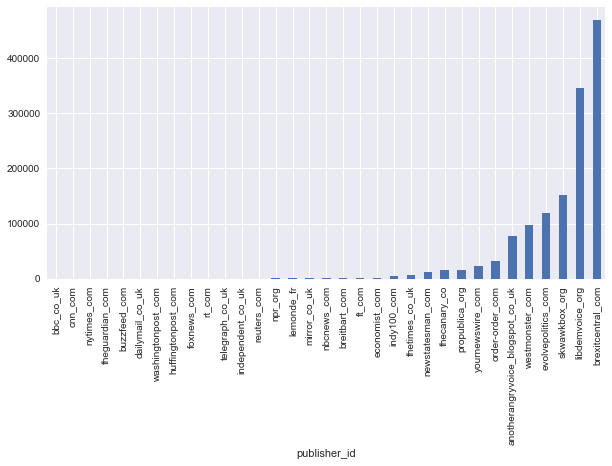

In [22]:
alexa_ranks.plot.bar(figsize=[10,5])

Let's try the simple option first: just divide the number of minutes as lead by the alexa rank. What's the scale of numbers we get then.

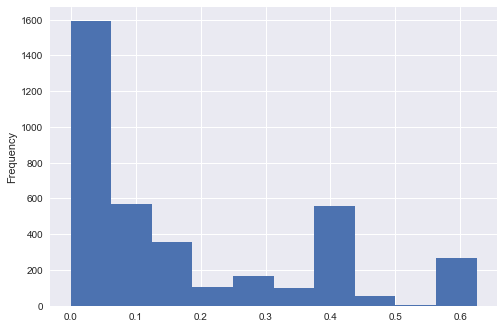

In [23]:
lead_proposal_1 = lead_articles.mins_as_lead.clip_upper(60) / lead_articles.alexa_rank
lead_proposal_1.plot.hist()

Looks like there's too much of a cluster around 0. Have we massively over penalised the publishers with a high alexa rank?

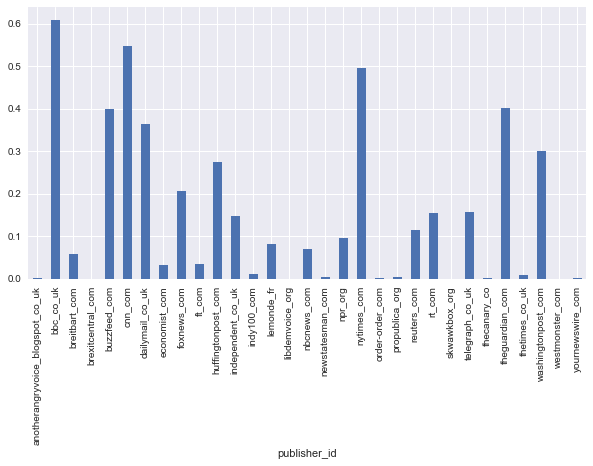

In [24]:
lead_proposal_1.groupby(data.publisher_id).mean().plot.bar(figsize=[10,5])

Yes. Let's try taking the log of the alexa rank and see if that looks better.

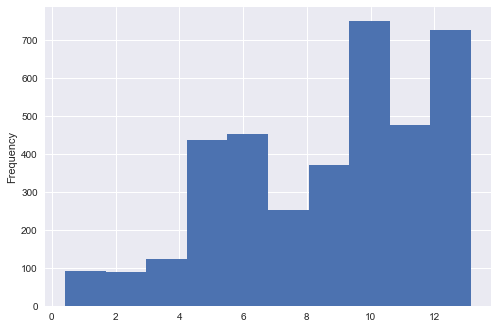

In [25]:
lead_proposal_2 = (lead_articles.mins_as_lead.clip_upper(60) / np.log(lead_articles.alexa_rank))
lead_proposal_2.plot.hist()

In [26]:
lead_proposal_2.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,28.00,5.33,0.00,5.33,5.33,5.33,5.33,5.33
bbc_co_uk,103.00,12.80,1.68,2.19,13.15,13.15,13.15,13.15
breitbart_com,194.00,8.32,1.43,0.72,8.69,8.69,8.69,8.69
brexitcentral_com,51.00,4.16,1.11,0.77,4.59,4.59,4.59,4.59
buzzfeed_com,290.00,11.73,1.21,2.00,12.02,12.02,12.02,12.02
cnn_com,190.00,12.36,1.81,2.15,12.89,12.89,12.89,12.89
dailymail_co_uk,158.00,11.39,1.70,1.78,11.85,11.85,11.85,11.85
economist_com,65.00,7.79,0.98,2.40,7.99,7.99,7.99,7.99
foxnews_com,95.00,10.45,1.05,0.88,10.61,10.61,10.61,10.61


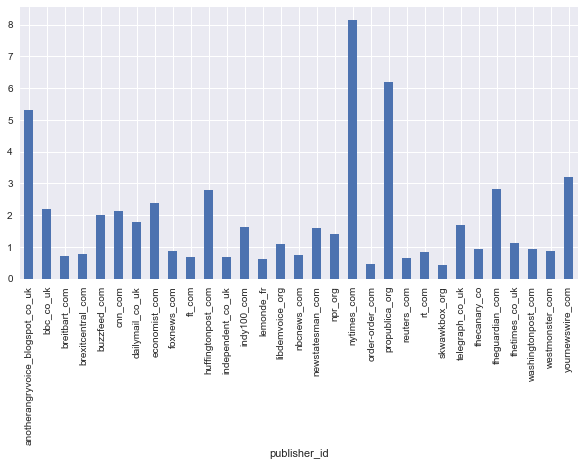

In [27]:
lead_proposal_2.groupby(data.publisher_id).min().plot.bar(figsize=[10,5])

That looks about right, as long as the smaller publishers were closer to zero. So let's apply feature scaling to this, to give a number between 1 and 20. (Anything not as lead will pass though as zero.)

In [28]:
def rescale(series):
    return (series - series.min()) / (series.max() - series.min())

lead_proposal_3 = np.ceil(20 * rescale(lead_proposal_2))

In [29]:
lead_proposal_2.min(), lead_proposal_2.max()

(0.41894447029448817, 13.145359968846892)

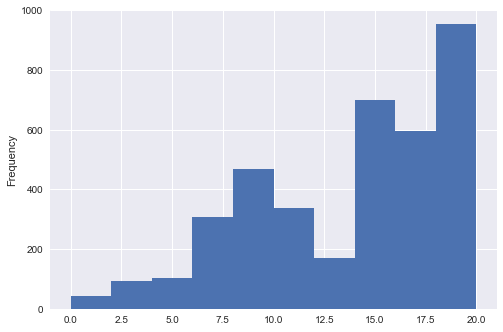

In [30]:
lead_proposal_3.plot.hist()

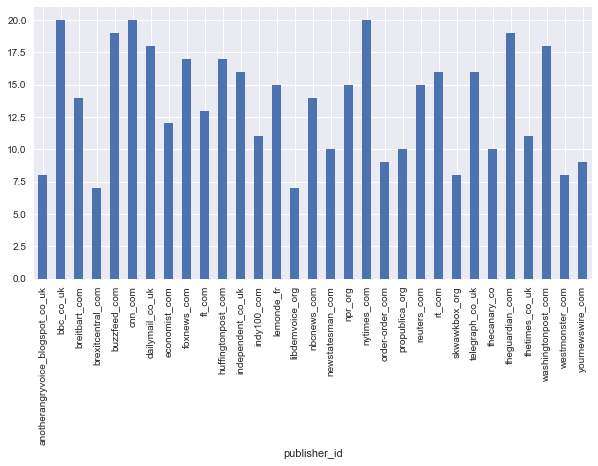

In [31]:
lead_proposal_3.groupby(data.publisher_id).median().plot.bar(figsize=[10,5])

In [32]:
data["lead_score"] = pd.concat([lead_proposal_3, data.mins_as_lead[data.mins_as_lead==0]])

In [33]:
data.lead_score.value_counts().sort_index()

0.00     132294
1.00         41
2.00         49
3.00         45
4.00         44
5.00         60
6.00         63
7.00        244
8.00        194
9.00        273
10.00       179
11.00       159
12.00        93
13.00        77
14.00       293
15.00       407
16.00       343
17.00       251
18.00       226
19.00       407
20.00       320
Name: lead_score, dtype: int64

In [34]:
data.lead_score.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          20.00
breitbart_com                      14.00
brexitcentral_com                   7.00
buzzfeed_com                       19.00
cnn_com                            20.00
dailymail_co_uk                    18.00
economist_com                      12.00
evolvepolitics_com                  0.00
foxnews_com                        17.00
ft_com                             13.00
huffingtonpost_com                 17.00
independent_co_uk                  16.00
indy100_com                        11.00
lemonde_fr                         15.00
libdemvoice_org                     7.00
mirror_co_uk                        0.00
nbcnews_com                        14.00
newstatesman_com                   10.00
npr_org                            15.00
nytimes_com                        20.00
order-order_com                     9.00
propublica_org                     10.00
reuters_com                        15.00
rt_

In summary then, score for article $a$ is:


$$
unscaledLeadScore_a = \frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)}\\
leadScore_a = 19 \cdot 
\frac{unscaledLeadScore_a - \min(unscaledLeadScore)}
{\max(unscaledLeadScore) - \min(unscaledLeadScore)} 
+ 1
$$

Since the minium value of $minsAsLead$ is 1, $\min(unscaledLeadScore)$ is pretty insignificant. So we can simplify this to:

$$
leadScore_a = 20 \cdot 
\frac{unscaledLeadScore_a }
     {\max(unscaledLeadScore)} 
$$

or: 

$$
leadScore_a = 20 \cdot 
\frac{\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} }
     {\frac{60}{\log(\max(alexaRank))}} 
$$

$$
leadScore_a = \left( 20 \cdot 
\frac{\min(minsAsLead_a, 60)}{\log(alexaRank_a)} \cdot
     {\frac{\log(\max(alexaRank))}{60}} \right)
$$

## Time on front score (15 points)

This is similar to time as lead, so lets try doing the same calculation, except we also want to factor in the number of slots on the front:


$$frontScore_a = 
15 
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) 
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right)$$

In [35]:
(data.alexa_rank * data.num_articles_on_front).min() / 1440

2.4500000000000002

In [36]:
time_on_front_proposal_1 = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15)

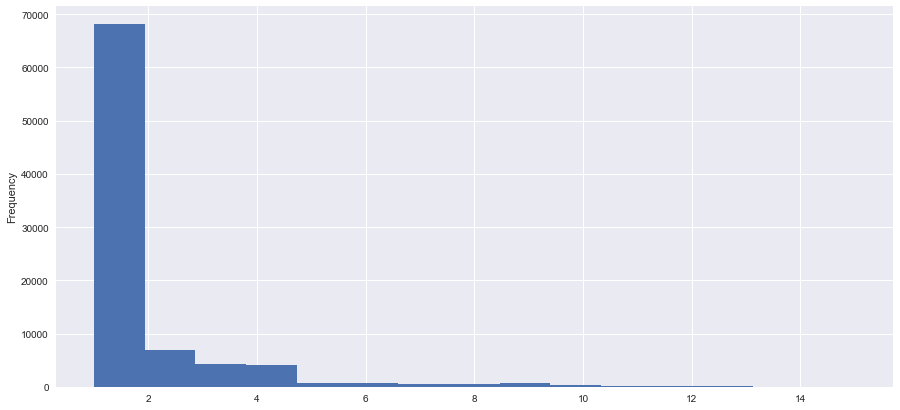

In [37]:
time_on_front_proposal_1.plot.hist(figsize=(15, 7), bins=15)

In [38]:
time_on_front_proposal_1.value_counts().sort_index()

1.00     68084
2.00      6873
3.00      4369
4.00      4066
5.00       769
6.00       643
7.00       543
8.00       522
9.00       774
10.00      359
11.00      135
12.00      135
13.00       92
14.00       49
15.00       20
dtype: int64

In [39]:
time_on_front_proposal_1.groupby(data.publisher_id).sum()

publisher_id
anotherangryvoice_blogspot_co_uk      28.00
bbc_co_uk                          13177.00
breitbart_com                       2469.00
brexitcentral_com                     59.00
buzzfeed_com                        9419.00
cnn_com                            11915.00
dailymail_co_uk                    13020.00
economist_com                        316.00
evolvepolitics_com                    59.00
foxnews_com                         6728.00
ft_com                              2871.00
huffingtonpost_com                  7483.00
independent_co_uk                   3708.00
indy100_com                          434.00
lemonde_fr                          3752.00
libdemvoice_org                      148.00
mirror_co_uk                        9134.00
nbcnews_com                         1633.00
newstatesman_com                     413.00
npr_org                             2586.00
nytimes_com                         8873.00
order-order_com                      240.00
propublica_org     

That looks good to me.

In [40]:
data["front_score"] = np.ceil(data.mins_on_front.clip_upper(1440) / (data.alexa_rank * data.num_articles_on_front) * (2.45) * 15).fillna(0)

In [41]:
data.front_score 

id
402fd72431c6a0e29e76fc9abaa6bc0d42f2ea81   1.00
956698308752aa83f6ad988aa05a4f26f5514f9e   1.00
1524679962f3bef642390e1955d470fe0acc2aff   1.00
13646fa08dee5c8b5bdd718ab882cb988a1eb85f   1.00
44dccc673596c768f1129a020c1b6b0c6ff8ab66   1.00
c79fa786172cf75bc8c7df55261f88802762dfce   1.00
2ea986b1e9669911a984b966ceca1ce95fbfe119   1.00
c261550cf016a29150e2d0648916160178e69eaa   1.00
6faa4d962b6436f2db4a469d6d75b6f85e46eace   1.00
cfae32d025a1bfe4e55b5fc1e31f8822d54b1301   1.00
d91572cf3c19bfcb811f2ad3d76ba91c64a16dba   1.00
22064c30c58acf5f08ee572dbe05768d1342aac2   1.00
5dee083190bd81f2fa8eb58e584ece3fbfe81d81   1.00
da47e9b97d048bbd6416d5e6bd9819e05622bb20   1.00
9445e067eb1cfbae505a28911692b72f627a0302   1.00
9c1c83e1d94d6fab16933fbd6d82f4a17472214c   1.00
fed2156894429a97eaad8d263af59676cc1b0d4e   1.00
9d06a956e45f3d75253f25f142dcb008fbe91ec0   1.00
cba30053abc9c1e1bdc4400e87f0ae8b27b6dde1   1.00
ae8d3ed982b149d3a9e69abef81c06840b100954   1.00
65671059afa84f9546e0459a8316bebea025a

## Facebook brand page promotion (15 points)

One way a publisher has of promoting content is to post to their brand page. The significance of doing so is stronger when the brand page has more followers (likes).

$$ facebookPromotionProposed1_a = 15 \left( \frac {brandPageLikes_a} {\max(brandPageLikes)} \right) $$

Now lets explore the data to see if that makes sense. **tr;dr the formula above is incorrect**

In [42]:
data.fb_brand_page_likes.max()

45953133.0

In [43]:
facebook_promotion_proposed_1 = np.ceil((15 * (data.fb_brand_page_likes / data.fb_brand_page_likes.max())).fillna(0))

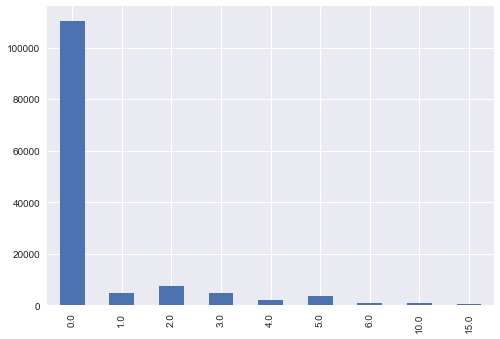

In [44]:
facebook_promotion_proposed_1.value_counts().sort_index().plot.bar()

In [45]:
facebook_promotion_proposed_1.groupby(data.publisher_id).describe()

,count,mean,std,min,25%,50%,75%,max
publisher_id,,,,,,,,
anotherangryvoice_blogspot_co_uk,28.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
bbc_co_uk,11509.00,0.55,2.81,0.00,0.00,0.00,0.00,15.00
breitbart_com,2565.00,0.78,0.98,0.00,0.00,0.00,2.00,2.00
brexitcentral_com,59.00,0.86,0.35,0.00,1.00,1.00,1.00,1.00
buzzfeed_com,1323.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
cnn_com,3898.00,2.48,4.32,0.00,0.00,0.00,0.00,10.00
dailymail_co_uk,23015.00,0.61,1.64,0.00,0.00,0.00,0.00,5.00
economist_com,501.00,2.46,1.16,0.00,3.00,3.00,3.00,3.00
evolvepolitics_com,63.00,0.95,0.21,0.00,1.00,1.00,1.00,1.00


That's too much variation: sites like the Guardian, which have a respectable 7.5m likes, should not be scoring a 3. Lets try applying a log to it, and then standard feature scaling again.

In [46]:
data.fb_brand_page_likes.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk     330207.00
bbc_co_uk                          45953133.00
breitbart_com                       3827443.00
brexitcentral_com                     15654.00
buzzfeed_com                        2929729.00
cnn_com                            29784431.00
dailymail_co_uk                    14362724.00
economist_com                       8474471.00
evolvepolitics_com                   127618.00
foxnews_com                        16239060.00
ft_com                              3755253.00
huffingtonpost_com                  9856230.00
independent_co_uk                   8077017.00
indy100_com                          239388.00
lemonde_fr                          4058907.00
libdemvoice_org                        8629.00
mirror_co_uk                        2982278.00
nbcnews_com                         9578008.00
newstatesman_com                     154662.00
npr_org                             6299668.00
nytimes_com                        15379547.00


In [47]:
np.log(2149)

7.6727578966425103

In [48]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max())

publisher_id
anotherangryvoice_blogspot_co_uk   12.71
bbc_co_uk                          17.64
breitbart_com                      15.16
brexitcentral_com                   9.66
buzzfeed_com                       14.89
cnn_com                            17.21
dailymail_co_uk                    16.48
economist_com                      15.95
evolvepolitics_com                 11.76
foxnews_com                        16.60
ft_com                             15.14
huffingtonpost_com                 16.10
independent_co_uk                  15.90
indy100_com                        12.39
lemonde_fr                         15.22
libdemvoice_org                     9.06
mirror_co_uk                       14.91
nbcnews_com                        16.07
newstatesman_com                   11.95
npr_org                            15.66
nytimes_com                        16.55
order-order_com                    10.73
propublica_org                     12.85
reuters_com                        15.20
rt_

That's more like it, but the lower numbers should be smaller.

In [49]:
np.log(data.fb_brand_page_likes.groupby(data.publisher_id).max() / 1000)

publisher_id
anotherangryvoice_blogspot_co_uk    5.80
bbc_co_uk                          10.74
breitbart_com                       8.25
brexitcentral_com                   2.75
buzzfeed_com                        7.98
cnn_com                            10.30
dailymail_co_uk                     9.57
economist_com                       9.04
evolvepolitics_com                  4.85
foxnews_com                         9.70
ft_com                              8.23
huffingtonpost_com                  9.20
independent_co_uk                   9.00
indy100_com                         5.48
lemonde_fr                          8.31
libdemvoice_org                     2.16
mirror_co_uk                        8.00
nbcnews_com                         9.17
newstatesman_com                    5.04
npr_org                             8.75
nytimes_com                         9.64
order-order_com                     3.82
propublica_org                      5.94
reuters_com                         8.29
rt_

In [50]:
scaled_fb_brand_page_likes = (data.fb_brand_page_likes / 1000)
facebook_promotion_proposed_2 = np.ceil(\
    (15 * \
     (np.log(scaled_fb_brand_page_likes) / np.log(scaled_fb_brand_page_likes.max()))\
    )\
                                       ).fillna(0)

In [51]:
facebook_promotion_proposed_2.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    9.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   4.00
buzzfeed_com                       12.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  7.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         8.00
lemonde_fr                         12.00
libdemvoice_org                     4.00
mirror_co_uk                       12.00
nbcnews_com                        13.00
newstatesman_com                    8.00
npr_org                            13.00
nytimes_com                        14.00
order-order_com                     6.00
propublica_org                      9.00
reuters_com                        12.00
rt_

LGTM. So the equation is


$$ facebookPromotion_a = 15 \left( 
\frac {\log(\frac {brandPageLikes_a}{1000})} 
{\log(\frac {\max(brandPageLikes)}{1000}))} \right) $$


Now, let's try applying standard feature scaling approch to this, rather than using a magic number of 1,000. That equation would be:

\begin{align}
unscaledFacebookPromotion_a &= 
   \log(brandPageLikes_a) \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \min(unscaledFacebookPromotion)}{\max(unscaledFacebookPromotion) - \min(unscaledFacebookPromotion)}  \\
\\
\text{The scaling can be simplified to:} \\
facebookPromotion_a &= 
   15 \cdot \frac{unscaledFacebookPromotion_a - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \\
\\
\text{Meaning the overall equation becomes:} \\
facebookPromotion_a &= 
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))} 
   \end{align}


In [52]:
facebook_promotion_proposed_3 = np.ceil(
    (14 * 
     ( 
         (np.log(data.fb_brand_page_likes) - np.log(data.fb_brand_page_likes.min()) ) /
         (np.log(data.fb_brand_page_likes.max()) - np.log(data.fb_brand_page_likes.min()))
     )
    ) + 1
                                       )

In [53]:
facebook_promotion_proposed_3.groupby(data.publisher_id).max()

publisher_id
anotherangryvoice_blogspot_co_uk    8.00
bbc_co_uk                          15.00
breitbart_com                      12.00
brexitcentral_com                   3.00
buzzfeed_com                       11.00
cnn_com                            15.00
dailymail_co_uk                    14.00
economist_com                      13.00
evolvepolitics_com                  6.00
foxnews_com                        14.00
ft_com                             12.00
huffingtonpost_com                 13.00
independent_co_uk                  13.00
indy100_com                         7.00
lemonde_fr                         12.00
libdemvoice_org                     2.00
mirror_co_uk                       11.00
nbcnews_com                        13.00
newstatesman_com                    6.00
npr_org                            12.00
nytimes_com                        14.00
order-order_com                     4.00
propublica_org                      8.00
reuters_com                        12.00
rt_

In [54]:
data["facebook_promotion_score"] = facebook_promotion_proposed_3.fillna(0.0)

# Review

In [55]:
data["promotion_score"] = (data.lead_score + data.front_score + data.facebook_promotion_score)
data["attention_index"] = (data.promotion_score + data.response_score)

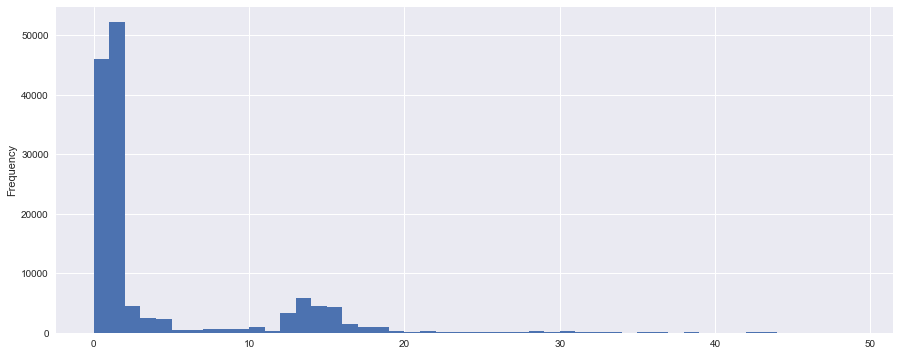

In [56]:
data.promotion_score.plot.hist(bins=np.arange(50), figsize=(15,6))

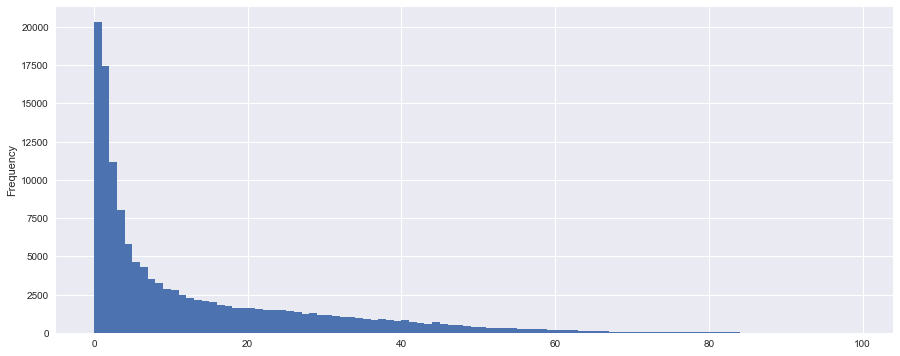

In [57]:
data.attention_index.plot.hist(bins=np.arange(100), figsize=(15,6))

In [58]:
data.attention_index.value_counts().sort_index()

0.00     20300
1.00     17446
2.00     11190
3.00      8050
4.00      5819
5.00      4612
6.00      4321
7.00      3502
8.00      3230
9.00      2833
10.00     2778
11.00     2473
12.00     2249
13.00     2144
14.00     2048
15.00     2005
16.00     1848
17.00     1782
18.00     1652
19.00     1634
20.00     1623
21.00     1545
22.00     1478
23.00     1479
24.00     1475
25.00     1439
26.00     1365
27.00     1230
28.00     1293
29.00     1178
         ...  
65.00      129
66.00       99
67.00       72
68.00       64
69.00       64
70.00       59
71.00       46
72.00       34
73.00       47
74.00       41
75.00       36
76.00       24
77.00       24
78.00       34
79.00       23
80.00       25
81.00       21
82.00       20
83.00       20
84.00       19
85.00       10
86.00        9
87.00       12
88.00       15
89.00        8
90.00        2
91.00        6
92.00        7
93.00        2
94.00        5
Name: attention_index, Length: 95, dtype: int64

In [59]:
# and lets see the articles with the biggest attention index
data.sort_values("attention_index", ascending=False)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_likes,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index
id,,,,,,,,,,,,,,,,,,,,,
50f3ffd91e936ee865166c1ba7ee6cd494cef168,https://www.cnn.com/2018/02/11/health/aetna-ca...,State launches Aetna probe after stunning admi...,2018-02-11 21:16:21.717,2018-02-11 21:11:31,188224,193.70,2018-02-14T00:19:21.586Z,44043,109177,35004,...,29612675.00,2018-02-11T22:30:02.000Z,105,1758.00,50.00,20.00,9.00,15.00,44.00,94.00
bcde74d11c6932b426cd8629622a7a144de96318,https://www.buzzfeed.com/briannasacks/the-fbi-...,The FBI Was Warned About A School Shooting Thr...,2018-02-15 09:25:25.051,2018-02-15 07:38:51,105241,194.90,2018-02-15T16:26:23.527Z,29924,54373,20944,...,2919016.00,2018-02-15T09:43:35.000Z,147,502.00,50.00,19.00,14.00,11.00,44.00,94.00
7fa31adc8e694a8f269a2d264135cbac1b284b30,https://www.cnn.com/2018/02/16/politics/muelle...,Grand jury returns indictment against 13 Russi...,2018-02-16 18:13:14.937,2018-02-16 18:04:10,169116,598.03,2018-02-16T18:35:18.373Z,51967,93366,23783,...,29638206.00,2018-02-16T18:14:03.000Z,105,66.00,50.00,20.00,9.00,15.00,44.00,94.00
99ac15ddfc4a2219d9038bdac94f963bb9ee80a2,http://money.cnn.com/2018/02/23/news/companies...,Enterprise car rental ends NRA partnership,2018-02-23 16:44:14.552,2018-02-23 16:25:22,371853,1020.00,2018-02-24T16:49:12.315Z,47062,295122,29669,...,29731553.00,2018-02-24T16:11:42.000Z,105,nan,50.00,20.00,9.00,15.00,44.00,94.00
3690e4bb3501e7ea4987e134a0ab4197b04eb22a,https://www.cnn.com/2018/02/15/us/florida-shoo...,These are the victims of the Florida school sh...,2018-02-15 17:06:22.819,2018-02-15 16:59:11,148598,407.25,2018-02-16T10:03:11.380Z,18324,113279,16995,...,29660971.00,2018-02-18T14:30:17.000Z,105,280.00,50.00,20.00,9.00,15.00,44.00,94.00
fed2f0bddae438ac1ed84db4a496d38a55ee1b8e,https://www.cnn.com/2018/02/03/politics/paul-r...,Paul Ryan deletes tweet about tax cuts after T...,2018-02-03 21:07:09.817,2018-02-03 21:03:15,105556,190.11,2018-02-05T00:07:11.101Z,25550,64114,15892,...,29587000.00,2018-02-04T02:30:02.000Z,105,411.00,50.00,20.00,8.00,15.00,43.00,93.00
ef30eb097153cc6c4ae903708b1af28058f8c30c,https://www.cnn.com/2018/02/22/politics/donald...,Trump proposes bonuses for teachers who get gu...,2018-02-22 18:43:22.074,2018-02-22 18:39:10,239328,556.07,2018-02-22T20:21:18.030Z,102984,120967,15377,...,29720711.00,2018-02-22T19:45:06.000Z,105,455.00,50.00,20.00,8.00,15.00,43.00,93.00
595d15633260734dcd8d7d96b1f1995a38adc53d,https://www.buzzfeed.com/remysmidt/heres-what-...,Here’s What It’s Like At The Headquarters Of T...,2018-02-20 05:25:13.116,2018-02-20 05:08:34,272546,290.43,2018-02-20T17:51:13.097Z,18984,224646,28916,...,2923003.00,2018-02-20T15:02:00.000Z,147,1107.00,50.00,19.00,12.00,11.00,42.00,92.00
3bd8bbc894078c77eec7ec36ec28065981d395dc,https://www.cnn.com/2018/02/23/politics/parkla...,Sources: Coral Springs police upset at some Br...,2018-02-23 21:40:15.835,2018-02-23 21:35:48,79066,111.20,2018-02-23T22:14:03.424Z,29161,36820,13085,...,29727467.00,2018-02-23T21:47:07.000Z,105,799.00,48.00,20.00,9.00,15.00,44.00,92.00


In [60]:
data["score_diff"] = data.promotion_score - data.response_score

In [61]:
# promoted but low response
data.sort_values("score_diff", ascending=False).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
2dd7184cf1962f76dc17a9d4b910c9c961c4a639,https://www.buzzfeed.com/stephaniemcneal/monat,This Trendy Hair Company Is Suing A Woman Who ...,2018-02-07 19:37:11.282,2018-02-01 15:42:38,9,0.82,2018-02-07T19:49:11.063Z,0,0,9,...,2018-02-07T20:39:47.000Z,147,1673.00,2.00,19.00,15.00,11.00,45.00,47.00,43.00
ccef80e232f379f5df12683200476c17734b8d49,https://www.buzzfeed.com/patrickstrudwick/this...,This Man Is Planning To Open The World's Large...,2018-02-27 08:09:13.612,2018-02-23 12:25:59,4,0.09,2018-02-27T08:21:08.839Z,0,2,2,...,2018-02-27T14:54:08.000Z,147,1530.00,1.00,19.00,14.00,11.00,44.00,45.00,43.00
77b260359cdb03b2a160441e435208aec0755826,https://www.buzzfeed.com/katebubacz/what-happe...,What Happened After Standing Rock?,2018-02-28 22:04:16.683,2018-02-22 23:43:47,0,0.00,2018-02-28T22:15:21.682Z,0,0,0,...,2018-03-01T00:52:51.000Z,147,4975.00,0.00,19.00,13.00,11.00,43.00,43.00,43.00
872a77a39949fce75a819caa9b57ff25eda8d1d7,https://www.buzzfeed.com/hannahallam/inside-th...,Inside The Uneasy Fight To End Female Genital ...,2018-02-05 14:04:16.865,2018-02-01 21:06:42,1,0.09,2018-02-05T14:16:13.088Z,0,0,1,...,2018-02-05T16:14:53.000Z,147,2097.00,0.00,19.00,12.00,11.00,42.00,42.00,42.00
dd3b404c6f7743717957de0cb9db0a63a86bc385,https://www.buzzfeed.com/buzzfeednews/heres-ho...,Here's How Many Medals The US Has Won So Far A...,2018-02-11 02:44:12.255,2018-02-09 18:28:27,1,0.10,2018-02-11T02:55:18.851Z,0,0,1,...,2018-02-14T03:18:57.000Z,147,nan,0.00,19.00,12.00,11.00,42.00,42.00,42.00
5a88c2c270cd23fbb4caa33f9f592bd2eb8b7979,https://www.buzzfeed.com/emaoconnor/columbia-t...,She “Provoked” Him: Columbia’s Old Policies Le...,2018-03-01 16:49:33.800,2018-02-26 23:23:53,2,0.18,2018-03-01T17:01:22.335Z,0,0,2,...,2018-03-01T17:11:17.000Z,147,3974.00,1.00,19.00,12.00,11.00,42.00,43.00,41.00
367ce38e6802afe4b09fa8562631c7abedebbe08,https://www.buzzfeed.com/carolinekee/juul-ecig...,The JUUL Is An Insanely Popular E-Cigarette Bu...,2018-02-05 22:52:21.271,2018-02-02 18:38:13,2,0.18,2018-02-05T23:04:10.998Z,0,0,2,...,2018-02-06T01:14:32.000Z,147,83.00,1.00,19.00,10.00,11.00,40.00,41.00,39.00
08bd4bc0640627333b78efecb6c02c69f2eb2bdc,https://www.buzzfeed.com/mitchprothero/their-p...,Their Parents Fought With ISIS. Now France Is ...,2018-02-19 14:04:23.387,2018-02-18 20:55:53,23,0.10,2018-02-19T15:17:08.351Z,2,4,17,...,2018-02-19T21:49:19.000Z,147,688.00,4.00,19.00,13.00,11.00,43.00,47.00,39.00
77e20f89fc8c29a4e763cc24cd844a37e40b378f,https://www.buzzfeed.com/alisonwillmore/fifty-...,Difficult Men Meet Their Match In “Fifty Shade...,2018-02-15 18:04:25.149,2018-02-14 17:26:42,2,0.18,2018-02-15T18:16:11.035Z,0,0,2,...,2018-02-19T03:01:00.000Z,147,2552.00,1.00,17.00,12.00,11.00,40.00,41.00,39.00


In [62]:
# high response but not promoted
data.sort_values("score_diff", ascending=True).head(25)

,url,headline,discovered,published,fb_engagements,fb_max_engagements_per_min,fb_max_engagements_per_min_time,fb_comments,fb_reactions,fb_shares,...,fb_brand_page_time,alexa_rank,word_count,response_score,lead_score,front_score,facebook_promotion_score,promotion_score,attention_index,score_diff
id,,,,,,,,,,,,,,,,,,,,,
5e21237490a319711d22eea26dc26a4c3682dea0,https://www.washingtonpost.com/news/reliable-s...,Dolly Parton likes to give away books. She jus...,2018-02-27 19:13:20.537,2018-02-27 19:02:15.000,114572,448.59,2018-02-28T06:02:20.498Z,7737,96894,9941,...,NaN,191,322.00,50.00,0.00,0.00,0.00,0.00,50.00,-50.00
9e82991a7f4b60377f15ada5d5bb9f02c57a892f,https://www.washingtonpost.com/news/national/w...,Armed deputy on duty at Fla. school waited out...,2018-02-22 23:14:14.096,2018-02-22 23:10:00.000,201911,385.05,2018-02-23T00:09:16.414Z,93017,86962,21932,...,NaN,191,102.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
0663587e18695b514a676ef31678320225937272,http://www.foxnews.com/us/2018/02/13/delaware-...,"Delaware may let students ‘choose’ their race,...",2018-02-20 20:14:20.100,2018-02-20 20:01:33.000,126486,170.66,2018-02-21T05:54:20.144Z,44600,69253,12633,...,NaN,285,827.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
fb1944a99013e1b35fd6a91c48804999102e083e,https://www.nbcnews.com/politics/donald-trump/...,Trump Signs Bill Revoking Obama-Era Gun Checks...,2018-02-15 21:25:15.475,2018-02-15 21:23:07.000,1733438,4222.05,2018-02-17T21:37:14.123Z,579201,879715,274522,...,NaN,826,410.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
d700e2555219b689fa3e9165aea1ed1817931a69,http://www.foxnews.com/us/2018/02/27/texas-gir...,"Texas girl, 17, stabs newborn to death minutes...",2018-02-28 00:39:13.863,2018-02-28 00:39:13.863,113688,70.98,2018-03-01T02:58:10.218Z,25583,68921,19184,...,NaN,285,344.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
5c33cf13f73345e32664ed8be841dc56b86e107d,https://www.indy100.com/article/emma-gonzalez-...,The Florida student spearheading the gun debat...,2018-02-25 11:24:17.265,2018-02-25 11:16:22.000,159836,126.53,2018-02-25T22:14:10.236Z,10622,138519,10695,...,NaN,5014,258.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
073db9d2d004bb61e3f507a4670347f1142b1819,http://www.foxnews.com/us/2018/02/20/florida-h...,Florida House aide fired after claiming Florid...,2018-02-21 00:49:14.722,2018-02-21 00:49:14.722,99873,103.73,2018-02-21T14:02:13.113Z,42670,42234,14969,...,NaN,285,590.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00
8d3e2975bed53d3885889ca47afdc8a309d74370,https://www.washingtonpost.com/opinions/beat-y...,"Beat your wife, lose your gun. That’s how it s...",2018-02-28 00:16:12.833,2018-02-28 00:09:50.000,84513,307.37,2018-03-02T16:10:07.064Z,12548,66034,5931,...,NaN,191,501.00,49.00,0.00,0.00,0.00,0.00,49.00,-49.00
6864f9a08eee3a16c208675d81ea26c6dba34608,http://www.dailymail.co.uk/tvshowbiz/article-5...,MAFS stars Troy and Carly engage in steamy kis...,2018-02-12 01:10:20.976,2018-02-12 01:07:48.000,112395,245.34,2018-02-12T05:35:12.625Z,99171,11772,1452,...,NaN,158,438.00,50.00,0.00,1.00,0.00,1.00,51.00,-49.00


Write that data to a file. Note that the scores here are provisional for two reasons:
1. they should be using a rolling-month based on the article publication date to calculate medians/min/max etc, whereas in this workbook we as just using values for the month of May
2. for analysis, we've rounded the numbers; we don't expect to do that for the actual scores

In [63]:
data.to_csv("articles_with_provisional_scores_" + date_filename + ".csv")

# Summary

The attention index of an article is comprised of four components:

- *lead score* (max 20 points) based on how long an article was the lead story on the publisher's home page, scaled by the traffic to that publisher
- *front score* (max 15 points) based on how long an article was present on the publisher's home page, scaled by traffic to that publisher
- *Facebook promotion score* (max 15 points) based on whether the article was promoted to the publisher's Facebook brand page, scaled by the reach of that brand page
- *response score* (max 50 points) based on the number of Facebook engagements the article received, relative to other articles

Or, in other words:

\begin{align}
attentionIndex_a &= leadScore_a + frontScore_a + facebookPromotionScore_a + responseScore_a \\
leadScore_a &= 20 \cdot \left(\frac{\min(minsAsLead_a, 60)}{alexaRank_a}\right) \cdot \left( \frac{\min(alexaRank)}{60} \right) \\
frontScore_a &= 
15 \cdot
\left(\frac{\min(minsOnFront_a, 1440)}{alexaRank_a \cdot numArticlesOnFront_a}\right) \cdot
\left( \frac{\min(alexaRank \cdot numArticlesOnFront)}{1440} \right) \\
facebookPromotion_a &= 
\begin{cases}
 0 \text{ if not shared on brand page }\\
   15 \cdot \frac{\log(brandPageLikes_a) - \log(\min(brandPageLikes))}{\log(\max(brandPageLikes)) - \log(\min(brandPageLikes))}  \text{ otherwise }
\end{cases}   
\\
responseScore_a &= 
\begin{cases} 
   0 \text{ if } engagements_a = 0 \\
   50 \cdot 
   \frac{\log(\min(engagements_a,limit) + median(engagements)) - \log(1 + median(engagements))}
   {\log(limit + median(engagements)) - \log(1 + median(engagements))} \text{ if } engagements_a > 0
\end{cases} \\
\end{align} 